# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = f"https://api.openweathermap.org"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Raises an exception for bad responses
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(0.5)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ust'-charyshskaya pristan'
Processing Record 4 of Set 1 | karamay
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | patacamaya
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | ahau
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | gibong
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | vadso
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | saksaul'skiy
City not found. Skipping...


In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,63.32,94,94,21.45,SH,1735004294
1,waitangi,-43.9535,-176.5597,61.36,92,60,9.22,NZ,1735004295
2,ust'-charyshskaya pristan',52.3934,83.6635,-10.01,100,92,2.55,RU,1735004295
3,karamay,45.6004,84.8661,11.57,93,100,2.57,CN,1735004296
4,guerrero negro,27.9769,-114.0611,60.13,90,55,10.31,MX,1735004296


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,63.32,94,94,21.45,SH,1735004294
1,waitangi,-43.9535,-176.5597,61.36,92,60,9.22,NZ,1735004295
2,ust'-charyshskaya pristan',52.3934,83.6635,-10.01,100,92,2.55,RU,1735004295
3,karamay,45.6004,84.8661,11.57,93,100,2.57,CN,1735004296
4,guerrero negro,27.9769,-114.0611,60.13,90,55,10.31,MX,1735004296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

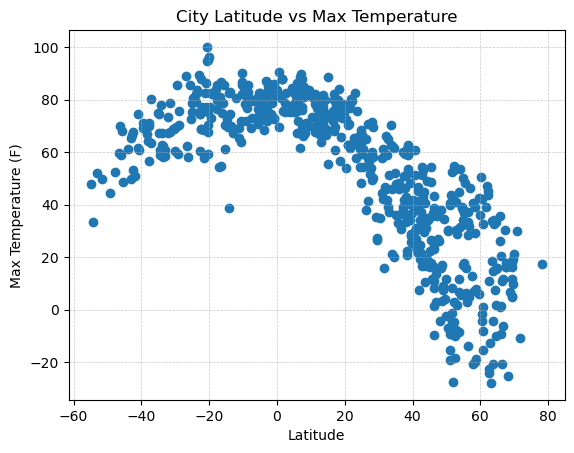

In [56]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

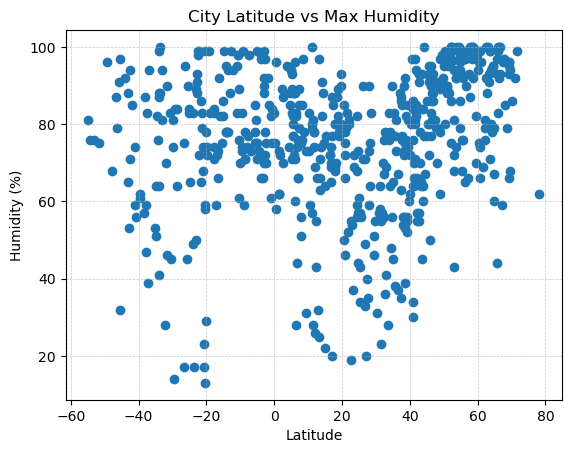

In [57]:
# Build the scatter plots for latitude vs. humidity
y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Max Humidity")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

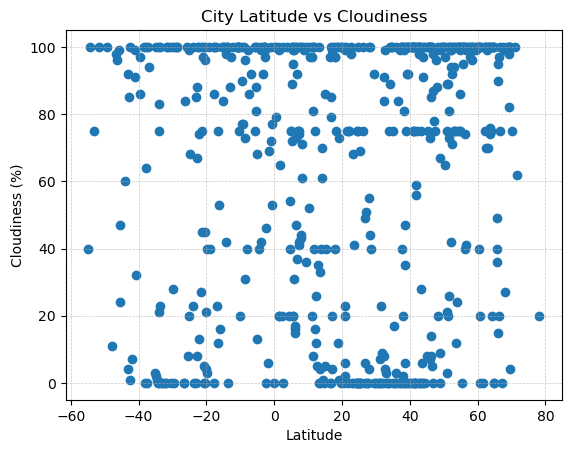

In [58]:
# Build the scatter plots for latitude vs. cloudiness
y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

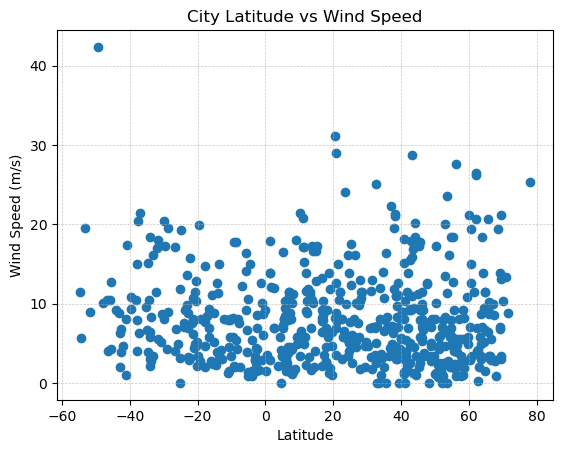

In [59]:
# Build the scatter plots for latitude vs. wind speed
y = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def cool_linear_regression_function(hemisphere_df, param_choice, cool_ylabel):
    # set parameters
    x = hemisphere_df['Lat']
    y = hemisphere_df[param_choice]
    # get all the needed data
    slope, intercept, r, p, std_err = linregress(x,y)
    print(f"The r² value is {round(r**2,3)}")

    # Plot data points
    plt.scatter(x, y, label='City data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')
    
    # Set labels
    plt.title(f"City Latitude VS {param_choice}")
    plt.xlabel("Latitude")
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(),y.max(), equation_text, fontsize=12, color='red')
    
    plt.legend()

    plt.show()

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ust'-charyshskaya pristan',52.3934,83.6635,-10.01,100,92,2.55,RU,1735004295
3,karamay,45.6004,84.8661,11.57,93,100,2.57,CN,1735004296
4,guerrero negro,27.9769,-114.0611,60.13,90,55,10.31,MX,1735004296
6,wailua homesteads,22.0669,-159.3780,79.59,81,75,11.50,US,1735004298
11,dudinka,69.4058,86.1778,5.41,93,100,21.18,RU,1735004301


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,63.32,94,94,21.45,SH,1735004294
1,waitangi,-43.9535,-176.5597,61.36,92,60,9.22,NZ,1735004295
5,namibe,-15.1961,12.1522,70.47,82,100,5.10,AO,1735004297
7,grytviken,-54.2811,-36.5092,33.49,76,100,5.64,GS,1735004298
8,port elizabeth,-33.9180,25.5701,62.89,99,75,5.75,ZA,1735004299


###  Temperature vs. Latitude Linear Regression Plot

The r² value is 0.708


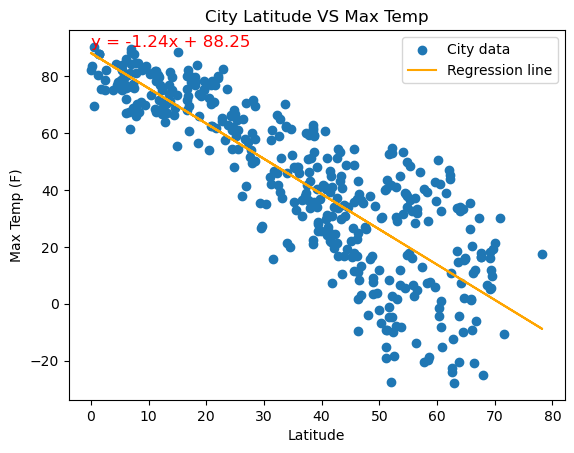

In [63]:
# Linear regression on Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Max Temp', 'Max Temp (F)')

The r² value is 0.33


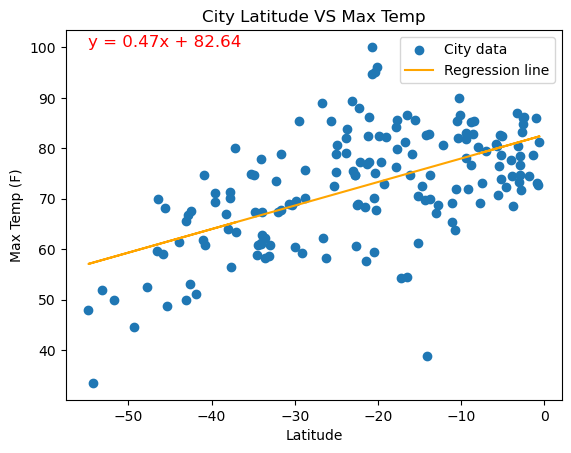

In [64]:
# Linear regression on Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, 'Max Temp', 'Max Temp (F)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r² value is 0.125


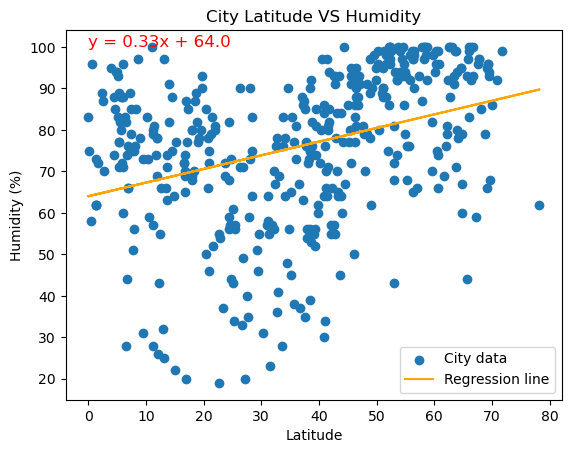

In [65]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Humidity', 'Humidity (%)')

The r² value is 0.029


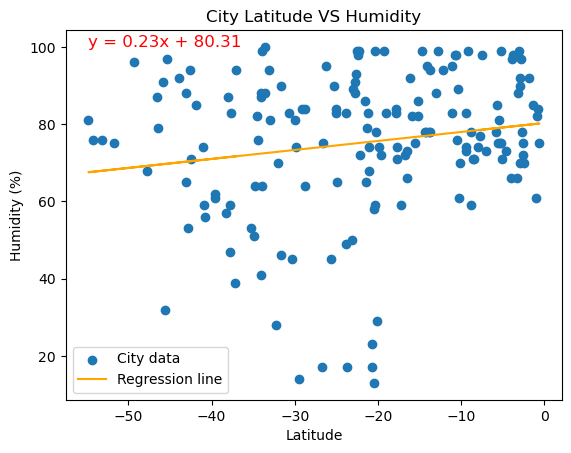

In [66]:
# Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, "Humidity", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r² value is 0.035


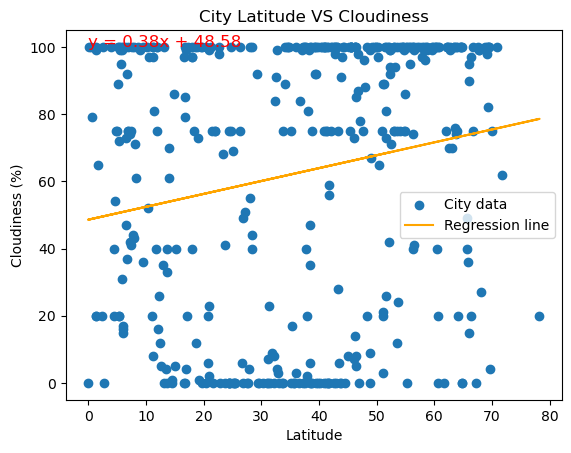

In [67]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Cloudiness', 'Cloudiness (%)')

The r² value is 0.032


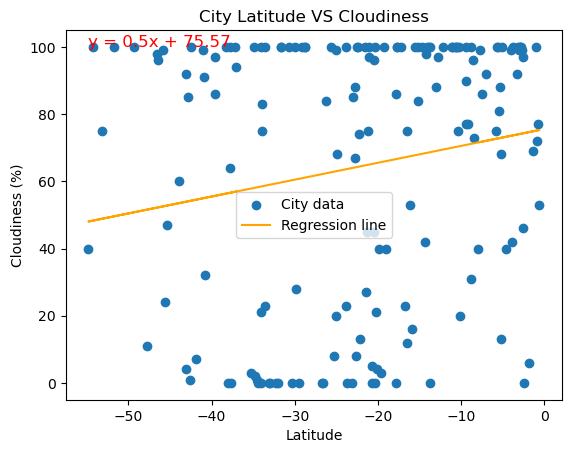

In [68]:
# Southern Hemisphere
cool_linear_regression_function(southern_hemi_df, 'Cloudiness', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r² value is 0.0


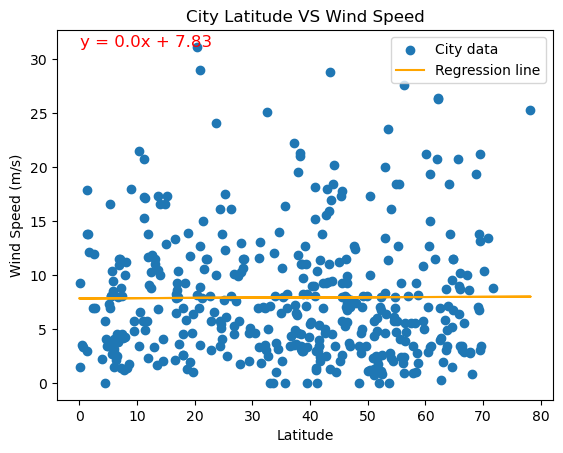

In [69]:
# Northern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Wind Speed', 'Wind Speed (m/s)')

The r² value is 0.0


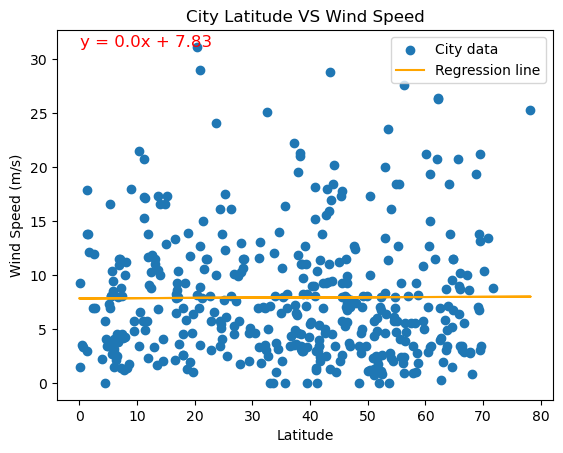

In [70]:
# Southern Hemisphere
cool_linear_regression_function(northern_hemi_df, 'Wind Speed', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

City Latitude vs. Max Temperature (F): This graph illustrates that temperatures peak near the equator and diminish toward the poles, exhibiting a relatively symmetric pattern.

City Latitude vs. Humidity (%): Like temperature, humidity is highest near the equator. However, humidity displays significant variability across different latitudes.

City Latitude vs. Wind Speed: The data shows that most cities experience wind speeds below 10 m/s, with occasional spikes exceeding 20 m/s. There is a noticeable trend of increasing wind speeds at higher latitudes.